In [1]:
import numpy as np, pandas as pd
from scipy.spatial.distance import cdist 
from matplotlib import pyplot as plt

In [2]:
iris = pd.read_csv("iris_data.txt", header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris = iris.rename({0:"SL", 1:"SW", 2:"PL", 3:"PW", 4:"class"}, axis='columns')
iris.head()

,SL,SW,PL,PW,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x = iris.iloc[:,:4].to_numpy() # keep features and ignore labels. Convert to numpy
                               # labels will be used later on to check clustering performance
print(x.shape)
x[:10]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Initialize centroids - Step 0

In [5]:
k = 3 # number of clusters
np.random.seed(42)
idx = np.random.choice(len(x), k, replace=False) # False => random selection with no replacement
centroids = x[idx, :]
centroids

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3]])

### Compute the distance between centroids and all data points - Step 1.a

In [6]:
distances = cdist(x, centroids, 'euclidean') # Step 1.a
print(distances.shape)
distances[:10,:] # display distances for first 10 samples

(150, 3)


array([[3.65786823, 0.74161985, 6.49846136],
       [3.65650106, 1.17473401, 6.53146232],
       [3.83144881, 1.23693169, 6.71788657],
       [3.68510515, 1.32287566, 6.59014416],
       [3.7067506 , 0.79372539, 6.55362495],
       [3.36749165, 0.33166248, 6.13432963],
       [3.78285606, 1.2083046 , 6.67083203],
       [3.57910603, 0.83666003, 6.44204936],
       [3.8457769 , 1.61245155, 6.7557383 ],
       [3.60277671, 1.1       , 6.48768063]])

### Check:
- 1st flower features: [5.1, 3.5, 1.4, 0.2]
- 1st centroid: [6.1, 2.8, 4.7, 1.2]
- distance to first centroid fort first observation: 3.65650106
We can check that:
$$\sqrt{\strut(6.1-5.1)^2 + (2.8-3.5)^2 + (4.7-1.4)^2 + (1.2-0.2)^2}=3.65786823$$

- 1st flower features: [5.1, 3.5, 1.4, 0.2]
- 2nd centroid: [5.7, 3.8, 1.7, 0.3]
- distance to second centroid fort first observation: 0.74161985
We can check that:
$$\sqrt{\strut(5.7-5.1)^2 + (3.8-3.5)^2 + (1.7-1.4)^2 + (0.3-0.2)^2}=0.74161985$$

### Centroid with minimum distance to - Step 1.b

In [7]:
z = np.array([np.argmin(i) for i in distances]) # retrieves in each row of distances matrix
                                                # the column that displays the smallest distance
                                                # i.e. the centroid the flower is closest to
z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int64)

### Update $k$ centroids as the mean of samples that are closest to it - Step 2

In [8]:
nb_iterations = 10
for _ in range(nb_iterations): 
    centroids = []
    for idx in range(k): 
        kth_cent = x[z==idx].mean(axis=0) # selects samples assigned to centroid k and computes mean column-wise
        centroids.append(kth_cent) # generates list of arrays
    centroids = np.vstack(centroids) # vertically tiles arrays -> new centroid values
    distances = cdist(x, centroids ,'euclidean') # compute distances with new centroids
    z = np.array([np.argmin(i) for i in distances]) # (re-)assign samples to closest centroid

In [9]:
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Compare cluster assignment to true labels

In [10]:
iris_clustered = pd.concat([iris, pd.Series(z).rename("cluster")], axis=1)
iris_clustered.head()

,SL,SW,PL,PW,class,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


### Replace iris name by code: Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2 

In [11]:
mapping = {'class': ["Iris-setosa","Iris-versicolor","Iris-virginica"], 'code': [0,1,2]}
IrisToCode = pd.DataFrame.from_dict(mapping)
IrisToCode

,class,code
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [12]:
iris_clustered = iris_clustered.merge(IrisToCode)
iris_clustered.head()

,SL,SW,PL,PW,class,cluster,code
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0


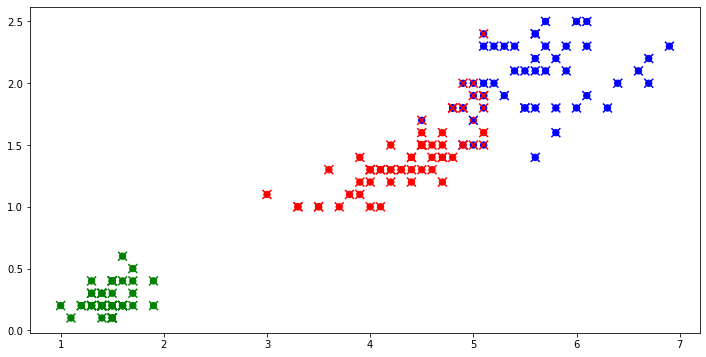

In [13]:
plt.rcParams["figure.figsize"] = (12, 6) # (w, h)
colormap1=np.array(['red','green','blue'])
colormap2=np.array(['green','red','blue'])
# We just use PL and PW features to get a 2D scatter plot
plt.scatter(iris_clustered["PL"], iris_clustered["PW"], c=colormap2[iris_clustered["code"]], marker='o', s=40)
plt.scatter(iris_clustered["PL"], iris_clustered["PW"], c=colormap1[iris_clustered["cluster"]], marker='x', s=80)